In [ ]:
import numpy as np
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
from scipy import ndimage

In [ ]:
%matplotlib inline

In [ ]:
# utils

def load_image(filename, as_gray=False, as_float=False):
    if as_gray:
        a = np.asarray(Image.open(filename).convert('L'))
    else:
        a = np.asarray(Image.open(filename))
    if as_float:
        return a.astype(np.float) / 255
    else:
        return a

def display_image(im, as_gray=False, title=None):
    plt.figure(figsize=(9,4))
    if as_gray:
        plt.imshow(im, cmap='gray')
    else:
        plt.imshow(im)
    if title is not None:
        plt.title(title)

def display_vec(v, title=None):
    plt.figure(figsize=(9,4))
    plt.plot(v)
    if title is not None:
        plt.title(title)

In [ ]:
!wget 'https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png'

--2024-09-20 09:28:47--  https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.154.240, 2620:0:861:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|208.80.154.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 473831 (463K) [image/png]
Saving to: ‘Lenna_(test_image).png’

Lenna_(test_image). 100%[===================>] 462.73K  --.-KB/s    in 0.06s   

2024-09-20 09:28:48 (7.60 MB/s) - ‘Lenna_(test_image).png’ saved [473831/473831]



In [ ]:
im = load_image('Lenna_(test_image).png', as_gray=True, as_float=False)

In [ ]:
# syntax examples

range(10) # 0..9
range(1,10) # 1..9

# loop in image
for i in range(im.shape[0]):
    for j in range(im.shape[1]):
        v = im[i,j]

# create vector, matrix
np.zeros((3,), dtype=int)
np.zeros((3,4), dtype=int)

# get element count
im.size

# define function
def f(arg):
    return 0

In [ ]:
# define functions (with loops):
#   hist(im) -> H
#   cdf(H) -> v
#   hist_equalize(im) -> im
#
# display results
#
# optional: implement contrast augmentation: remove lower/upper 5% of values, remap others linearly to [0,255]

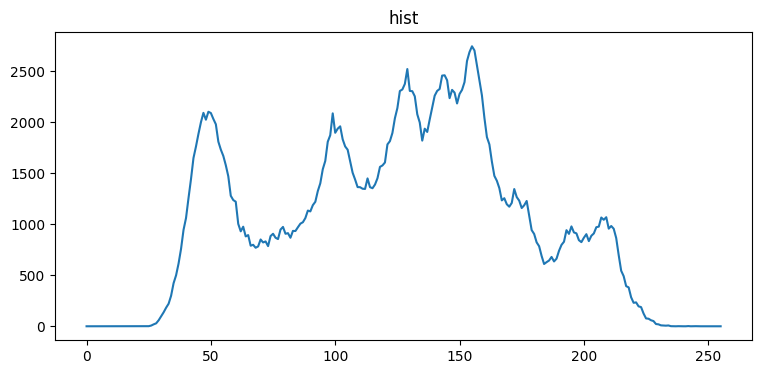

In [ ]:
def hist(im):
    H = np.zeros((256,), dtype=int)
    for i in range(im.shape[0]):
        for j in range(im.shape[1]):
            v = im[i, j]  # Value of the pixel
            H[v] += 1  # Increment the value to get the histogram
    return H

display_vec(hist(im), title='hist')

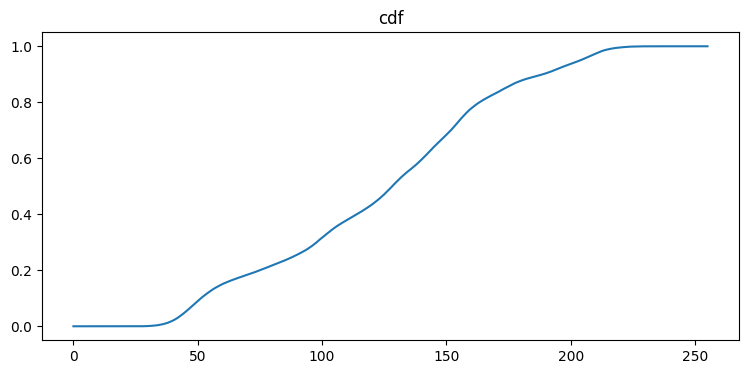

In [ ]:
def cdf(H):
    Hcum = np.zeros_like(H)  # Créer un tableau de zéros de la même taille que H
    total_pixels = np.sum(H)  # Calculer la somme totale des pixels (normalisation)

    # Boucle pour calculer la somme cumulative
    for i in range(len(H)):
        if i == 0:
            Hcum[i] = H[i]  # Le premier élément reste le même
        else:
            Hcum[i] = Hcum[i - 1] + H[i]  # Ajoute la valeur précédente cumulée à H[i]

    # Normalisation par le nombre total de pixels
    Hcum_normalized = np.zeros_like(Hcum, dtype=float)
    for i in range(len(Hcum)):
        Hcum_normalized[i] = Hcum[i] / total_pixels  # Normalisation entre 0 et 1

    return Hcum_normalized


display_vec(cdf(hist(im)), title='cdf')

In [ ]:
def hist_eq(im):
    H = hist(im)
    Hcum = cdf(H)
    for i in range(256):
        Hcum[i] = ##
    im_eq = im.copy()
    for i in range(im.shape[0]):
        for j in range(im.shape[1]):
            ##
    return im_eq

display_vec(hist(hist_eq(im)), title='equalized hist')
display_vec(cdf(hist(hist_eq(im))), title='equalized cdf')
display_image(hist_eq(im), title='equalized im')

SyntaxError: invalid syntax (<ipython-input-14-66ef06d1d0d0>, line 5)

In [ ]:
# implement convolution with loops, uneven filter size

def conv(im, filt):
    im_conv = np.zeros_like(im)
    for i in range(im_conv.shape[0]):
        for j in range(im_conv.shape[1]):
            v = 0
            ##
                ##
                    if y >= 0 and x >= 0 and y < im.shape[0] and x < im.shape[1]:
                        v += ##
            im_conv[i,j] = v
    return im_conv

gx = conv(im.astype(int), np.asarray([[1, 0, -1]]))
display_image(gx)

# what happens if we omit "astype(int)"?

In [ ]:
# we'll now use scipy.ndimage.filters.convolve, way faster
from scipy.ndimage.filters import convolve

In [ ]:
# Sobel filter: gx, gy, norm (np.sqrt), angle (np.arctan2)
gx = convolve(im.astype(np.int), np.asarray(
    [[##,##,##],
     [##,##,##],
     [##,##,##]]
))
gy = convolve(im.astype(np.int), np.asarray(
    [[##,##,##],
     [##,##,##],
     [##,##,##]])
display_image(gy, as_gray=True)

gn = ##
display_image(gn, as_gray=True)
ga = ##
display_image(ga)